In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression, Ridge, Lasso # models we are going to use
from sklearn.metrics import r2_score # for comparing the predicted and test values


In [2]:
colnames=['Year','Month', 'Date', 'Hour', 'Minute', 'Dry_bulb_temperature', 'Dew_point_temperature', 'Apparent_temperature', 
          'Relative_humidity', 'Wind_direction', 'Average_wind-speed', 'Wind-gust', 'Mean_sea_level_pressure', 'Rainfall']

Mel = pd.read_csv('Melbourne01.txt',sep = '\s+', names=colnames, header=None)
Ade = pd.read_csv('Adelaide01.txt',sep = '\s+', names=colnames, header=None)
Mel.head()

C:\Users\wsm\Downloads\a\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
1,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
3,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0


In [102]:
Ade

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
0,2015,8,15,9,0,12.2,11.2,11.0,92.0,N,9.0,13.0,1032.7,1.4
1,2015,8,15,9,30,12.9,11.8,10.6,86.0,N,11.0,13.0,1032.9,0.0
2,2015,8,15,10,0,12.9,11.8,10.8,87.0,N,11.0,17.0,1032.9,0.0
3,2015,8,15,10,30,13.6,12.5,10.7,82.0,NW,15.0,17.0,1032.9,0.0
4,2015,8,15,11,0,13.5,12.3,10.2,80.0,NW,13.0,17.0,1032.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570982,2022,3,8,15,10,22.3,18.7,9.8,45.0,SSE,32.0,46.0,1018.7,0.0
570983,2022,3,8,15,10,22.3,18.7,9.8,45.0,SSE,32.0,46.0,1018.7,0.0
570984,2022,3,8,15,30,22.7,19.1,10.5,46.0,SSE,32.0,43.0,1018.6,0.0
570985,2022,3,8,15,30,22.7,19.1,10.5,46.0,SSE,32.0,43.0,1018.6,0.0


In [103]:
Ade.describe()

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Average_wind-speed,Wind-gust,Mean_sea_level_pressure
count,570987.000000,570987.000000,570987.000000,570987.000000,570987.000000,570987.000000,570987.000000,570987.000000,570987.000000,570987.000000,570987.000000,570987.000000
mean,2018.219229,6.650892,15.750928,11.424642,24.772182,17.678848,15.361556,8.129394,58.587887,17.425115,22.313564,1017.073399
std,1.859066,3.617234,8.823703,6.874539,17.028419,6.643467,14.892378,4.075670,21.135910,9.713035,26.247699,18.134833
min,2015.000000,1.000000,1.000000,0.000000,0.000000,1.100000,-9999.000000,-15.100000,4.000000,0.000000,-9999.000000,-9999.000000
25%,2017.000000,3.000000,8.000000,5.000000,10.000000,12.800000,10.300000,5.500000,44.000000,11.000000,13.000000,1012.300000
50%,2018.000000,7.000000,16.000000,11.000000,20.000000,16.500000,14.200000,8.100000,60.000000,17.000000,20.000000,1016.900000
75%,2020.000000,10.000000,23.000000,17.000000,40.000000,21.500000,19.600000,10.700000,75.000000,24.000000,32.000000,1021.800000
max,2022.000000,12.000000,31.000000,23.000000,59.000000,46.200000,44.700000,31.700000,100.000000,78.000000,111.000000,1038.800000


In [101]:
Mel.describe()

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall,WindSpeed_x,WindSpeed_y,WindGust_x,WindGust_y
count,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,4.903680e+05,4.903680e+05,4.903680e+05,4.903680e+05
mean,16.015086,12.086340,9.023293,66.089620,155.805920,19.991472,23.250428,1017.060193,0.783805,-3.977453e+00,2.734182e+00,-4.610961e+00,3.082467e+00
std,5.633975,7.214267,4.082687,17.689026,114.846628,10.248905,12.267774,7.548872,2.968532,1.032582e+01,1.935927e+01,1.213009e+01,2.265348e+01
min,0.500000,-4.100000,-8.700000,0.000000,0.000000,2.000000,2.000000,988.100000,0.000000,-8.300000e+01,-6.189993e+01,-1.090000e+02,-8.300000e+01
25%,12.100000,7.600000,6.100000,54.000000,0.000000,13.000000,13.000000,1012.100000,0.000000,-9.192388e+00,-1.202082e+01,-1.071514e+01,-1.385819e+01
50%,15.300000,11.700000,8.600000,67.000000,180.000000,19.000000,20.000000,1017.200000,0.000000,0.000000e+00,-2.388061e-15,0.000000e+00,-2.755455e-15
75%,19.200000,16.600000,11.700000,79.000000,247.500000,26.000000,30.000000,1022.300000,0.200000,2.326829e-15,1.700000e+01,2.449294e-15,1.900000e+01
max,43.500000,43.300000,36.900000,100.000000,337.500000,89.000000,109.000000,1039.000000,54.600000,4.988949e+01,8.900000e+01,5.820441e+01,1.040000e+02


In [3]:
Mel.head()

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
1,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
3,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0


In [4]:
Mel.tail()

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
1019649,2022,3,8,16,0,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0
1019650,2022,3,8,16,0,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0
1019651,2022,3,8,16,10,19.2,18.3,13.8,71.0,S,32.0,35.0,1017.8,0.0
1019652,2022,3,8,16,10,19.2,18.3,13.8,71.0,S,32.0,35.0,1017.8,0.0
1019653,2022,3,8,16,20,19.2,17.5,13.6,70.0,S,28.0,32.0,1017.7,0.0


In [5]:
Mel.drop_duplicates(inplace=True)
Mel.shape

(505356, 14)

In [6]:
Mel.dtypes

Year                         int64
Month                        int64
Date                         int64
Hour                         int64
Minute                       int64
Dry_bulb_temperature       float64
Dew_point_temperature      float64
Apparent_temperature       float64
Relative_humidity          float64
Wind_direction              object
Average_wind-speed         float64
Wind-gust                  float64
Mean_sea_level_pressure    float64
Rainfall                    object
dtype: object

In [7]:
# monthly split dataset, mean maximun and minimun temp, higherst and lowest temp,rain humidity

In [8]:
Mel.Wind_direction.unique()

array(['SE', 'ESE', 'NE', 'NNE', 'ENE', 'W', 'N', 'SW', 'SSE', 'S', 'SSW',
       'WSW', 'NW', 'WNW', 'NNW', 'E', 'CALM', '1016.6', '1016.9',
       '1017.0', '1017.4', '1026.0', '1026.1', '1025.3', '1024.2',
       '1029.6', '1003.3', '1008.2', '1019.0', '1015.5', '1014.2',
       '1015.9', '1016.2', '1016.1', '1014.1', '1014.0', '1013.6',
       '1012.7', '1013.1', '1014.4', '1014.6', '1015.6', '1015.8',
       '1016.7', '1017.2', '1016.0', '1017.8', '1019.5', '1019.8',
       '1019.9', '1020.4', '1021.0', '1021.2', '1021.7', '1021.9',
       '1022.3', '1022.7', '1004.5', '1022.0', '1010.3', '1012.0',
       '1010.8', '-'], dtype=object)

In [9]:
mask = Mel[Mel['Mean_sea_level_pressure'] <= 0.0]
mask

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
155561,2012,9,24,13,44,14.8,6.8,0.5,37.0,1016.6,0.0,0.0,0.0,0.0
155563,2012,9,24,13,54,13.8,6.4,2.1,45.0,1016.9,0.0,0.0,0.0,0.0
155564,2012,9,24,14,14,13.4,6.8,4.2,53.0,1017.0,0.0,0.0,0.0,0.0
155565,2012,9,24,14,34,14.3,7.0,2.3,44.0,1017.0,0.0,0.0,0.0,0.0
155566,2012,9,24,15,4,13.4,5.9,1.2,43.0,1017.4,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971472,2021,7,14,15,30,13.5,9.2,9.4,76.0,N,32.0,43.0,-9999.0,0.2
973743,2021,8,31,8,0,13.3,8.3,4.5,55.0,N,52.0,63.0,-9999.0,0.0
973744,2021,8,31,8,30,13.4,8.6,4.6,55.0,NNE,52.0,70.0,-9999.0,0.0
973745,2021,8,31,9,0,13.5,9.0,4.1,53.0,NNE,46.0,65.0,-9999.0,0.0


In [10]:
Mel.drop(Mel[Mel.Mean_sea_level_pressure <= 0.0].index, inplace=True)
Mel.describe()

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Average_wind-speed,Wind-gust,Mean_sea_level_pressure
count,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000
mean,2016.002161,6.464470,15.744411,11.444236,26.275295,15.970959,12.086627,9.055206,66.405166,19.387770,22.530147,1017.139006
std,3.150089,3.510631,8.817435,6.883936,17.199857,5.620026,7.203014,4.087443,17.733259,17.659748,23.640971,7.576082
min,2011.000000,1.000000,1.000000,0.000000,0.000000,0.500000,-4.100000,-8.700000,0.000000,-9999.000000,-9999.000000,988.100000
25%,2013.000000,3.000000,8.000000,5.000000,10.000000,12.100000,7.600000,6.100000,55.000000,11.000000,13.000000,1012.100000
50%,2016.000000,6.000000,16.000000,11.000000,25.000000,15.200000,11.800000,8.600000,67.000000,17.000000,20.000000,1017.300000
75%,2019.000000,10.000000,23.000000,17.000000,40.000000,19.200000,16.600000,11.700000,79.000000,26.000000,30.000000,1022.400000
max,2022.000000,12.000000,31.000000,23.000000,59.000000,43.500000,43.300000,36.900000,100.000000,100.000000,109.000000,1039.000000


In [11]:
mask = Mel[Mel['Average_wind-speed'] < 0.0]
mask

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
964665,2021,3,3,11,0,16.1,12.8,6.5,53.0,-,-9999.0,-9999.0,1020.8,0


In [12]:
Mel[Mel['Mean_sea_level_pressure'] <= 0.0]

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall


In [13]:
Mel.drop(Mel[Mel['Mean_sea_level_pressure'] <= 0].index,inplace = True)
Mel

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019645,2022,3,8,15,40,18.6,16.0,13.2,71.0,SSW,39.0,46.0,1018.0,0.0
1019647,2022,3,8,15,50,18.7,18.5,13.6,72.0,SSW,35.0,46.0,1017.9,0.0
1019649,2022,3,8,16,0,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0
1019651,2022,3,8,16,10,19.2,18.3,13.8,71.0,S,32.0,35.0,1017.8,0.0


In [14]:
Mel.drop(Mel[Mel.Mean_sea_level_pressure <= 0.0].index, inplace=True)
Mel.describe()

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Average_wind-speed,Wind-gust,Mean_sea_level_pressure
count,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000
mean,2016.002161,6.464470,15.744411,11.444236,26.275295,15.970959,12.086627,9.055206,66.405166,19.387770,22.530147,1017.139006
std,3.150089,3.510631,8.817435,6.883936,17.199857,5.620026,7.203014,4.087443,17.733259,17.659748,23.640971,7.576082
min,2011.000000,1.000000,1.000000,0.000000,0.000000,0.500000,-4.100000,-8.700000,0.000000,-9999.000000,-9999.000000,988.100000
25%,2013.000000,3.000000,8.000000,5.000000,10.000000,12.100000,7.600000,6.100000,55.000000,11.000000,13.000000,1012.100000
50%,2016.000000,6.000000,16.000000,11.000000,25.000000,15.200000,11.800000,8.600000,67.000000,17.000000,20.000000,1017.300000
75%,2019.000000,10.000000,23.000000,17.000000,40.000000,19.200000,16.600000,11.700000,79.000000,26.000000,30.000000,1022.400000
max,2022.000000,12.000000,31.000000,23.000000,59.000000,43.500000,43.300000,36.900000,100.000000,100.000000,109.000000,1039.000000


In [15]:
mask = Mel[Mel['Average_wind-speed'] <= 0.0]
mask

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
21,2011,1,1,1,44,23.4,0.0,13.4,53.0,ENE,0.0,0.0,1007.2,0.0
22,2011,1,1,2,14,23.7,0.0,13.8,53.0,ENE,0.0,0.0,1007.3,0.0
24,2011,1,1,2,24,23.6,0.0,13.1,51.0,W,0.0,0.0,1007.2,0.0
26,2011,1,1,2,34,23.1,0.0,13.3,54.0,W,0.0,0.0,1007.2,0.0
29,2011,1,1,2,44,22.8,0.0,13.9,57.0,W,0.0,0.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018707,2022,3,4,22,20,21.6,25.8,20.9,96.0,CALM,0.0,0.0,1008.5,1.0
1018709,2022,3,4,22,30,21.6,25.5,21.1,97.0,CALM,0.0,0.0,1008.5,1.0
1019136,2022,3,6,14,30,21.8,20.7,15.4,67.0,N,0.0,0.0,1016.2,0.0
1019362,2022,3,7,12,0,21.8,21.7,13.4,59.0,N,0.0,0.0,1014.4,0.0


In [16]:
Mel.drop(Mel[Mel['Average_wind-speed'] <= 0].index,inplace = True)
Mel

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019645,2022,3,8,15,40,18.6,16.0,13.2,71.0,SSW,39.0,46.0,1018.0,0.0
1019647,2022,3,8,15,50,18.7,18.5,13.6,72.0,SSW,35.0,46.0,1017.9,0.0
1019649,2022,3,8,16,0,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0
1019651,2022,3,8,16,10,19.2,18.3,13.8,71.0,S,32.0,35.0,1017.8,0.0


In [17]:
mask = Mel[Mel['Wind-gust'] <= 0.0]
mask

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
54413,2011,8,13,21,0,12.1,0.0,7.3,72.0,NNE,6.0,0.0,1024.5,0.0
54678,2011,8,14,21,30,12.2,0.0,8.6,78.0,NNW,9.0,0.0,1023.9,0.2
353659,2014,11,28,7,35,13.6,12.0,8.6,72.0,CALM,7.0,0.0,1023.9,0.0
353912,2014,11,29,7,55,14.7,14.6,10.9,78.0,CALM,2.0,0.0,1017.9,0.0
354271,2014,11,30,17,15,34.5,34.3,13.1,27.0,CALM,4.0,0.0,1003.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937361,2020,11,15,4,50,12.5,11.5,11.1,91.0,CALM,2.0,0.0,1009.5,0.0
938297,2020,11,18,19,40,25.1,21.8,4.3,26.0,CALM,7.0,0.0,1017.8,0.0
938982,2020,11,21,11,0,20.4,19.9,12.1,59.0,CALM,2.0,0.0,1018.6,0.0
964673,2021,3,3,15,0,17.3,14.3,7.9,54.0,S,28.0,-9999.0,1019.8,0


In [18]:
Mel.drop(Mel[Mel['Wind-gust'] <= 0].index,inplace = True)
Mel

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019645,2022,3,8,15,40,18.6,16.0,13.2,71.0,SSW,39.0,46.0,1018.0,0.0
1019647,2022,3,8,15,50,18.7,18.5,13.6,72.0,SSW,35.0,46.0,1017.9,0.0
1019649,2022,3,8,16,0,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0
1019651,2022,3,8,16,10,19.2,18.3,13.8,71.0,S,32.0,35.0,1017.8,0.0


In [19]:
Mel.drop(Mel[Mel.Rainfall == "-"].index, inplace=True)
Mel.Rainfall = pd.to_numeric(Mel.Rainfall)
Mel.describe()

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
count,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000
mean,2016.001372,6.475930,15.718132,11.475268,26.279280,16.015086,12.086340,9.023293,66.089620,19.991472,23.250428,1017.060193,0.783805
std,3.148962,3.516858,8.807164,6.866601,17.199447,5.633975,7.214267,4.082687,17.689026,10.248905,12.267774,7.548872,2.968532
min,2011.000000,1.000000,1.000000,0.000000,0.000000,0.500000,-4.100000,-8.700000,0.000000,2.000000,2.000000,988.100000,0.000000
25%,2013.000000,3.000000,8.000000,6.000000,10.000000,12.100000,7.600000,6.100000,54.000000,13.000000,13.000000,1012.100000,0.000000
50%,2016.000000,7.000000,16.000000,12.000000,25.000000,15.300000,11.700000,8.600000,67.000000,19.000000,20.000000,1017.200000,0.000000
75%,2019.000000,10.000000,23.000000,17.000000,40.000000,19.200000,16.600000,11.700000,79.000000,26.000000,30.000000,1022.300000,0.200000
max,2022.000000,12.000000,31.000000,23.000000,59.000000,43.500000,43.300000,36.900000,100.000000,89.000000,109.000000,1039.000000,54.600000


In [20]:
Mel

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019645,2022,3,8,15,40,18.6,16.0,13.2,71.0,SSW,39.0,46.0,1018.0,0.0
1019647,2022,3,8,15,50,18.7,18.5,13.6,72.0,SSW,35.0,46.0,1017.9,0.0
1019649,2022,3,8,16,0,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0
1019651,2022,3,8,16,10,19.2,18.3,13.8,71.0,S,32.0,35.0,1017.8,0.0


In [21]:
Mel.isnull().values.sum()

0

In [22]:
Mel

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019645,2022,3,8,15,40,18.6,16.0,13.2,71.0,SSW,39.0,46.0,1018.0,0.0
1019647,2022,3,8,15,50,18.7,18.5,13.6,72.0,SSW,35.0,46.0,1017.9,0.0
1019649,2022,3,8,16,0,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0
1019651,2022,3,8,16,10,19.2,18.3,13.8,71.0,S,32.0,35.0,1017.8,0.0


In [23]:
Mel['Time'] = pd.to_datetime({'year': Mel['Year'],
                                     'month': Mel['Month'],
                                     'day': Mel['Date'],
                                      'hour': Mel['Hour'],
                                     'minute': Mel['Minute']})

Mel = Mel[['Time','Dry_bulb_temperature','Dew_point_temperature','Apparent_temperature','Relative_humidity',
           'Wind_direction','Average_wind-speed',
                              'Wind-gust','Mean_sea_level_pressure','Rainfall']]


In [24]:
Mel = Mel.set_index('Time')
Mel

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
Time,,,,,,,,,
2011-01-01 00:04:00,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2011-01-01 00:14:00,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
2011-01-01 00:24:00,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
2011-01-01 00:34:00,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
2011-01-01 00:44:00,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...
2022-03-08 15:40:00,18.6,16.0,13.2,71.0,SSW,39.0,46.0,1018.0,0.0
2022-03-08 15:50:00,18.7,18.5,13.6,72.0,SSW,35.0,46.0,1017.9,0.0
2022-03-08 16:00:00,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0


In [25]:
Mel['Wind_direction'].unique()

array(['SE', 'ESE', 'NE', 'NNE', 'ENE', 'SW', 'SSE', 'S', 'SSW', 'WSW',
       'NW', 'WNW', 'W', 'NNW', 'N', 'E'], dtype=object)

In [26]:
d={'N':0,
   'NNE':22.5,
   "NE":45,
   "ENE":67.5, 
   'E':90,
   'ESE':112.5,
   'SE':135,
   'SSE':157.5,
   'S':180,
   'SSW':202.5,
   'SW':225,
   'WSW':247.5,
   'W':270,
   'WNW':292.5,
   'NW':315,
   'NNW':337.5,
   'N':0,
   'North':0,
   'East':90,
   'West':270,
   'South':180,
   'CALM':360,
   '-':360}

In [27]:
Mel['Wind_direction']=Mel['Wind_direction'].str.strip().replace(d)
Mel['Wind_direction'].unique()

array([135. , 112.5,  45. ,  22.5,  67.5, 225. , 157.5, 180. , 202.5,
       247.5, 315. , 292.5, 270. , 337.5,   0. ,  90. ])

In [28]:
Mel

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
Time,,,,,,,,,
2011-01-01 00:04:00,24.8,0.0,14.0,51.0,135.0,11.0,13.0,1007.4,0.0
2011-01-01 00:14:00,24.8,0.0,13.3,48.0,135.0,11.0,11.0,1007.5,0.0
2011-01-01 00:24:00,24.9,0.0,13.3,48.0,135.0,11.0,13.0,1007.5,0.0
2011-01-01 00:34:00,24.7,0.0,13.4,49.0,135.0,11.0,11.0,1007.4,0.0
2011-01-01 00:44:00,24.1,0.0,13.3,51.0,112.5,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...
2022-03-08 15:40:00,18.6,16.0,13.2,71.0,202.5,39.0,46.0,1018.0,0.0
2022-03-08 15:50:00,18.7,18.5,13.6,72.0,202.5,35.0,46.0,1017.9,0.0
2022-03-08 16:00:00,18.9,17.6,13.7,72.0,202.5,35.0,41.0,1017.8,0.0


In [29]:
mel_data= Mel

In [30]:
import numpy as np
Theta =np.pi/180*mel_data['Wind_direction'].astype(float)
mel_data['WindSpeed_x']=mel_data['Average_wind-speed']*np.sin(Theta)
mel_data['WindSpeed_y']=mel_data['Average_wind-speed']*np.cos(Theta)
mel_data['WindGust_x']=mel_data['Wind-gust']*np.sin(Theta)
mel_data['WindGust_y']=mel_data['Wind-gust']*np.cos(Theta)

In [31]:
mel_data

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall,WindSpeed_x,WindSpeed_y,WindGust_x,WindGust_y
Time,,,,,,,,,,,,,
2011-01-01 00:04:00,24.8,0.0,14.0,51.0,135.0,11.0,13.0,1007.4,0.0,7.778175e+00,-7.778175,9.192388e+00,-9.192388
2011-01-01 00:14:00,24.8,0.0,13.3,48.0,135.0,11.0,11.0,1007.5,0.0,7.778175e+00,-7.778175,7.778175e+00,-7.778175
2011-01-01 00:24:00,24.9,0.0,13.3,48.0,135.0,11.0,13.0,1007.5,0.0,7.778175e+00,-7.778175,9.192388e+00,-9.192388
2011-01-01 00:34:00,24.7,0.0,13.4,49.0,135.0,11.0,11.0,1007.4,0.0,7.778175e+00,-7.778175,7.778175e+00,-7.778175
2011-01-01 00:44:00,24.1,0.0,13.3,51.0,112.5,9.0,9.0,1007.3,0.0,8.314916e+00,-3.444151,8.314916e+00,-3.444151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08 15:40:00,18.6,16.0,13.2,71.0,202.5,39.0,46.0,1018.0,0.0,-1.492465e+01,-36.031302,-1.760344e+01,-42.498458
2022-03-08 15:50:00,18.7,18.5,13.6,72.0,202.5,35.0,46.0,1017.9,0.0,-1.339392e+01,-32.335784,-1.760344e+01,-42.498458
2022-03-08 16:00:00,18.9,17.6,13.7,72.0,202.5,35.0,41.0,1017.8,0.0,-1.339392e+01,-32.335784,-1.569002e+01,-37.879061


In [32]:
mel_data.isnull().sum().sum()

0

In [33]:
MelbourneRS=mel_data.resample('30T').mean()

In [34]:
MelbourneRS

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall,WindSpeed_x,WindSpeed_y,WindGust_x,WindGust_y
Time,,,,,,,,,,,,,
2011-01-01 00:00:00,24.833333,0.000000,13.533333,49.000000,135.0,11.000000,12.333333,1007.466667,0.0,7.778175e+00,-7.778175,8.720984e+00,-8.720984
2011-01-01 00:30:00,24.366667,0.000000,13.333333,50.000000,97.5,9.666667,9.666667,1007.333333,0.0,7.485684e+00,-1.619455,7.485684e+00,-1.619455
2011-01-01 01:00:00,23.633333,0.000000,13.466667,52.666667,52.5,7.666667,8.333333,1007.300000,0.0,5.820286e+00,4.196697,6.436205e+00,4.451820
2011-01-01 01:30:00,23.600000,0.000000,13.500000,53.000000,67.5,6.000000,7.000000,1007.300000,0.0,5.543277e+00,2.296101,6.467157e+00,2.678784
2011-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08 14:00:00,19.266667,17.600000,12.900000,66.666667,187.5,37.000000,44.000000,1017.966667,0.0,-4.719762e+00,-36.061181,-5.485129e+00,-42.908940
2022-03-08 14:30:00,19.133333,16.766667,13.333333,69.000000,187.5,37.000000,44.000000,1017.866667,0.0,-4.974885e+00,-36.010434,-6.122935e+00,-42.782073
2022-03-08 15:00:00,18.833333,15.833333,13.166667,69.666667,180.0,34.666667,43.000000,1017.833333,0.0,4.245442e-15,-34.666667,5.265981e-15,-43.000000


In [104]:
Ade.drop(Ade[Ade.Rainfall == "-"].index, inplace=True)
Ade.Rainfall = pd.to_numeric(Ade.Rainfall)
Ade.describe()

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
count,570894.000000,570894.000000,570894.000000,570894.000000,570894.000000,570894.000000,570894.000000,570894.000000,570894.000000,570894.000000,570894.000000,570894.000000,570894.000000
mean,2018.218776,6.651144,15.751174,11.424865,24.773637,17.679526,15.379676,8.129506,58.585953,17.426233,22.367865,1017.074292,0.657336
std,1.858879,3.617399,8.823957,6.874436,17.028346,6.643400,6.792877,4.075850,21.135558,9.712893,12.699994,18.135876,2.615544
min,2015.000000,1.000000,1.000000,0.000000,0.000000,1.100000,-1.400000,-15.100000,4.000000,0.000000,0.000000,-9999.000000,0.000000
25%,2017.000000,3.000000,8.000000,5.000000,10.000000,12.800000,10.300000,5.500000,44.000000,11.000000,13.000000,1012.300000,0.000000
50%,2018.000000,7.000000,16.000000,11.000000,20.000000,16.500000,14.200000,8.100000,60.000000,17.000000,20.000000,1016.900000,0.000000
75%,2020.000000,10.000000,23.000000,17.000000,40.000000,21.500000,19.600000,10.700000,75.000000,24.000000,32.000000,1021.800000,0.000000
max,2022.000000,12.000000,31.000000,23.000000,59.000000,46.200000,44.700000,31.700000,100.000000,78.000000,111.000000,1038.800000,61.200000


In [35]:
MelbourneRS['Average_wind-speed']=np.sqrt(MelbourneRS['WindSpeed_x']**2+MelbourneRS['WindSpeed_y']**2)
MelbourneRS['Wind-gust']=np.sqrt(MelbourneRS['WindGust_x']**2+MelbourneRS['WindGust_y']**2)
MelbourneRS['Wind_direction']=22.5*np.around(180/(22.5*np.pi)
                                            *np.arctan2(MelbourneRS['WindSpeed_x'],MelbourneRS['WindSpeed_y']**2))
MelbourneRS['Wind_direction']=MelbourneRS['Wind_direction']%360
MelbourneRS.drop(columns=['WindSpeed_x','WindSpeed_y','WindGust_x','WindGust_y'],inplace=True)

In [36]:
MRS = MelbourneRS.describe()
MRS

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
count,189598.000000,189598.000000,189598.000000,189598.000000,189598.000000,1.895980e+05,1.895980e+05,189598.000000,189598.000000
mean,15.927201,12.061932,9.005928,66.349631,64.793207,1.954239e+01,2.282756e+01,1017.117388,0.784632
std,5.605857,7.135234,4.065027,17.649738,125.268730,1.010443e+01,1.217273e+01,7.563120,2.976976
min,0.500000,-3.400000,-8.250000,0.000000,0.000000,3.673940e-16,4.286264e-16,988.500000,0.000000
25%,12.000000,7.600000,6.050000,54.666667,0.000000,1.177104e+01,1.341866e+01,1012.133333,0.000000
50%,15.200000,11.700000,8.550000,67.000000,0.000000,1.766667e+01,2.031999e+01,1017.266667,0.000000
75%,19.100000,16.533333,11.633333,79.333333,0.000000,2.554052e+01,3.000000e+01,1022.366667,0.200000
max,43.500000,43.300000,35.733333,100.000000,337.500000,8.275000e+01,1.020000e+02,1039.000000,54.600000


In [37]:
MelbourneRS['Rainfall'].isnull().sum()

6467

In [38]:
MelbourneRS.loc[MelbourneRS['Rainfall'].isnull(),'value_is_NaN'] = 1
MelbourneRS.loc[MelbourneRS['Rainfall'].notnull(), 'value_is_NaN'] = 0
MelbourneRS

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall,value_is_NaN
Time,,,,,,,,,,
2011-01-01 00:00:00,24.833333,0.000000,13.533333,49.000000,0.0,11.000000,12.333333,1007.466667,0.0,0.0
2011-01-01 00:30:00,24.366667,0.000000,13.333333,50.000000,67.5,7.658857,7.658857,1007.333333,0.0,0.0
2011-01-01 01:00:00,23.633333,0.000000,13.466667,52.666667,22.5,7.175513,7.825818,1007.300000,0.0,0.0
2011-01-01 01:30:00,23.600000,0.000000,13.500000,53.000000,45.0,6.000000,7.000000,1007.300000,0.0,0.0
2011-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
2022-03-08 14:00:00,19.266667,17.600000,12.900000,66.666667,0.0,36.368736,43.258106,1017.966667,0.0,0.0
2022-03-08 14:30:00,19.133333,16.766667,13.333333,69.000000,0.0,36.352453,43.218006,1017.866667,0.0,0.0
2022-03-08 15:00:00,18.833333,15.833333,13.166667,69.666667,0.0,34.666667,43.000000,1017.833333,0.0,0.0


In [39]:
MelbourneRS.drop(MelbourneRS[MelbourneRS['value_is_NaN'] == 1.0].index,inplace = True)
MelbourneRS

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall,value_is_NaN
Time,,,,,,,,,,
2011-01-01 00:00:00,24.833333,0.000000,13.533333,49.000000,0.0,11.000000,12.333333,1007.466667,0.0,0.0
2011-01-01 00:30:00,24.366667,0.000000,13.333333,50.000000,67.5,7.658857,7.658857,1007.333333,0.0,0.0
2011-01-01 01:00:00,23.633333,0.000000,13.466667,52.666667,22.5,7.175513,7.825818,1007.300000,0.0,0.0
2011-01-01 01:30:00,23.600000,0.000000,13.500000,53.000000,45.0,6.000000,7.000000,1007.300000,0.0,0.0
2011-01-01 03:30:00,20.550000,0.000000,14.500000,68.000000,0.0,8.000000,9.000000,1007.700000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-03-08 14:00:00,19.266667,17.600000,12.900000,66.666667,0.0,36.368736,43.258106,1017.966667,0.0,0.0
2022-03-08 14:30:00,19.133333,16.766667,13.333333,69.000000,0.0,36.352453,43.218006,1017.866667,0.0,0.0
2022-03-08 15:00:00,18.833333,15.833333,13.166667,69.666667,0.0,34.666667,43.000000,1017.833333,0.0,0.0


In [40]:
MelbourneRS=MelbourneRS.drop('value_is_NaN', axis = 1)
MelbourneRS

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
Time,,,,,,,,,
2011-01-01 00:00:00,24.833333,0.000000,13.533333,49.000000,0.0,11.000000,12.333333,1007.466667,0.0
2011-01-01 00:30:00,24.366667,0.000000,13.333333,50.000000,67.5,7.658857,7.658857,1007.333333,0.0
2011-01-01 01:00:00,23.633333,0.000000,13.466667,52.666667,22.5,7.175513,7.825818,1007.300000,0.0
2011-01-01 01:30:00,23.600000,0.000000,13.500000,53.000000,45.0,6.000000,7.000000,1007.300000,0.0
2011-01-01 03:30:00,20.550000,0.000000,14.500000,68.000000,0.0,8.000000,9.000000,1007.700000,0.0
...,...,...,...,...,...,...,...,...,...
2022-03-08 14:00:00,19.266667,17.600000,12.900000,66.666667,0.0,36.368736,43.258106,1017.966667,0.0
2022-03-08 14:30:00,19.133333,16.766667,13.333333,69.000000,0.0,36.352453,43.218006,1017.866667,0.0
2022-03-08 15:00:00,18.833333,15.833333,13.166667,69.666667,0.0,34.666667,43.000000,1017.833333,0.0


In [41]:
MelbourneMonthlyMax = MelbourneRS.resample('M').max()
MelbourneMonthlyMin = MelbourneRS.resample('M').min()
MelbourneMonthlyMean = MelbourneRS.resample('M').mean()



In [42]:
MelbourneMonthlyMax

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
Time,,,,,,,,,
2011-01-31,37.466667,0.000000,23.766667,100.0,337.5,52.000000,61.000000,1022.733333,27.733333
2011-02-28,39.533333,0.000000,23.066667,95.5,337.5,48.000000,58.500000,1028.400000,15.400000
2011-03-31,32.000000,0.000000,19.000000,97.5,337.5,63.000000,70.000000,1028.200000,11.200000
2011-04-30,26.000000,0.000000,16.266667,96.0,337.5,45.000000,54.000000,1031.900000,46.333333
2011-05-31,20.866667,0.000000,14.766667,96.0,337.5,47.000000,55.500000,1032.566667,21.200000
...,...,...,...,...,...,...,...,...,...
2021-11-30,30.733333,28.700000,18.750000,100.0,337.5,57.709076,72.093064,1026.533333,45.400000
2021-12-31,37.266667,34.400000,18.600000,100.0,337.5,53.077511,64.925907,1022.700000,11.800000
2022-01-31,36.400000,36.066667,21.900000,100.0,337.5,48.000000,56.000000,1028.100000,38.600000


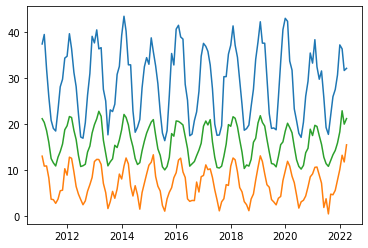

In [43]:
import matplotlib.pyplot as plt
plt.plot(MelbourneMonthlyMax.Dry_bulb_temperature)
plt.plot(MelbourneMonthlyMin.Dry_bulb_temperature)
plt.plot(MelbourneMonthlyMean.Dry_bulb_temperature)

In [44]:
def plt_correlation_matrix(corrs):
    '''Uses the seaborn heatmap to plot the correlation matrix of a pandas dataframe''' 
    # as this is a symmetric table, set up a mask so that we only plot values 
    # below the main diagonal
    mask = np.triu(np.ones_like(corrs, dtype=np.bool))
    f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
    # plot the correlations as a seaborn heatmap, with a colourbar
    sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
    # do some fiddling so that the top and bottom are not obscured
    bottom, top = ax.get_ylim() 
    ax.set_ylim(bottom + 0.5, top - 0.5)

<ipython-input-44-0c079bed5704>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corrs, dtype=np.bool))


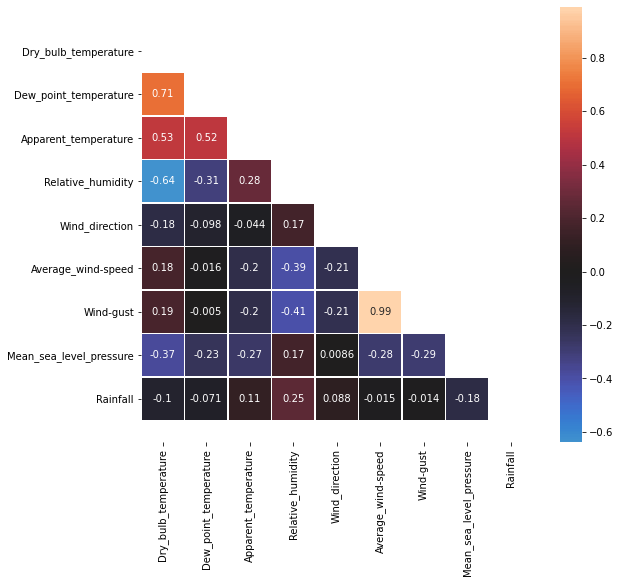

In [45]:
plt_correlation_matrix(MelbourneRS.corr()) 

In [46]:
X = MelbourneRS.drop(['Rainfall'],axis=1) # drop Y from our dataframe
Y = MelbourneRS['Rainfall']

In [47]:
rng = np.random.RandomState(1) # make sure the results are repeatable
# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.8) 
linear = LinearRegression() # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model
training_score = linear.score(X_train,Y_train) # calculate rsq for the training set
# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear = r2_score(Y_test,preds_linear) 
# print the training and testing scores
print("Training score is",round(training_score,4))
print("Testing score is",round(rsquared_linear,4))

Training score is 0.1328
Testing score is 0.1287


Let start SARIMA!!

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [49]:
Mel.describe()

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall,WindSpeed_x,WindSpeed_y,WindGust_x,WindGust_y
count,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,4.903680e+05,4.903680e+05,4.903680e+05,4.903680e+05
mean,16.015086,12.086340,9.023293,66.089620,155.805920,19.991472,23.250428,1017.060193,0.783805,-3.977453e+00,2.734182e+00,-4.610961e+00,3.082467e+00
std,5.633975,7.214267,4.082687,17.689026,114.846628,10.248905,12.267774,7.548872,2.968532,1.032582e+01,1.935927e+01,1.213009e+01,2.265348e+01
min,0.500000,-4.100000,-8.700000,0.000000,0.000000,2.000000,2.000000,988.100000,0.000000,-8.300000e+01,-6.189993e+01,-1.090000e+02,-8.300000e+01
25%,12.100000,7.600000,6.100000,54.000000,0.000000,13.000000,13.000000,1012.100000,0.000000,-9.192388e+00,-1.202082e+01,-1.071514e+01,-1.385819e+01
50%,15.300000,11.700000,8.600000,67.000000,180.000000,19.000000,20.000000,1017.200000,0.000000,0.000000e+00,-2.388061e-15,0.000000e+00,-2.755455e-15
75%,19.200000,16.600000,11.700000,79.000000,247.500000,26.000000,30.000000,1022.300000,0.200000,2.326829e-15,1.700000e+01,2.449294e-15,1.900000e+01
max,43.500000,43.300000,36.900000,100.000000,337.500000,89.000000,109.000000,1039.000000,54.600000,4.988949e+01,8.900000e+01,5.820441e+01,1.040000e+02


In [50]:
MelbourneRS.describe()

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
count,189598.000000,189598.000000,189598.000000,189598.000000,189598.000000,1.895980e+05,1.895980e+05,189598.000000,189598.000000
mean,15.927201,12.061932,9.005928,66.349631,64.793207,1.954239e+01,2.282756e+01,1017.117388,0.784632
std,5.605857,7.135234,4.065027,17.649738,125.268730,1.010443e+01,1.217273e+01,7.563120,2.976976
min,0.500000,-3.400000,-8.250000,0.000000,0.000000,3.673940e-16,4.286264e-16,988.500000,0.000000
25%,12.000000,7.600000,6.050000,54.666667,0.000000,1.177104e+01,1.341866e+01,1012.133333,0.000000
50%,15.200000,11.700000,8.550000,67.000000,0.000000,1.766667e+01,2.031999e+01,1017.266667,0.000000
75%,19.100000,16.533333,11.633333,79.333333,0.000000,2.554052e+01,3.000000e+01,1022.366667,0.200000
max,43.500000,43.300000,35.733333,100.000000,337.500000,8.275000e+01,1.020000e+02,1039.000000,54.600000


In [51]:
MelbourneRS

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
Time,,,,,,,,,
2011-01-01 00:00:00,24.833333,0.000000,13.533333,49.000000,0.0,11.000000,12.333333,1007.466667,0.0
2011-01-01 00:30:00,24.366667,0.000000,13.333333,50.000000,67.5,7.658857,7.658857,1007.333333,0.0
2011-01-01 01:00:00,23.633333,0.000000,13.466667,52.666667,22.5,7.175513,7.825818,1007.300000,0.0
2011-01-01 01:30:00,23.600000,0.000000,13.500000,53.000000,45.0,6.000000,7.000000,1007.300000,0.0
2011-01-01 03:30:00,20.550000,0.000000,14.500000,68.000000,0.0,8.000000,9.000000,1007.700000,0.0
...,...,...,...,...,...,...,...,...,...
2022-03-08 14:00:00,19.266667,17.600000,12.900000,66.666667,0.0,36.368736,43.258106,1017.966667,0.0
2022-03-08 14:30:00,19.133333,16.766667,13.333333,69.000000,0.0,36.352453,43.218006,1017.866667,0.0
2022-03-08 15:00:00,18.833333,15.833333,13.166667,69.666667,0.0,34.666667,43.000000,1017.833333,0.0


In [52]:
Melbourne_rs_monthly=Mel.resample('1M').mean()

In [53]:
Melbourne_rs_monthly.loc[Melbourne_rs_monthly['Rainfall'].isnull(),'value_is_NaN'] = 1
Melbourne_rs_monthly.loc[Melbourne_rs_monthly['Rainfall'].notnull(), 'value_is_NaN'] = 0
Melbourne_rs_monthly

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall,WindSpeed_x,WindSpeed_y,WindGust_x,WindGust_y,value_is_NaN
Time,,,,,,,,,,,,,,
2011-01-31,21.219440,0.000000,13.558376,63.720698,161.397942,17.848199,20.814465,1011.345798,1.142596,-1.072797,-4.740933,-1.198038,-5.617907,0.0
2011-02-28,20.380988,0.000000,13.359746,65.787577,168.024194,16.612217,19.272821,1014.928346,0.770487,-2.511055,-4.219830,-2.903442,-4.949119,0.0
2011-03-31,18.644747,0.000000,11.116854,63.379775,156.096910,17.952247,20.751685,1016.350955,0.589775,-3.408775,-1.859628,-3.911876,-2.321728,0.0
2011-04-30,16.101326,0.000000,9.616149,67.456161,152.171588,16.910214,19.201265,1022.149503,1.171618,-4.420382,4.190706,-4.995952,4.580593,0.0
2011-05-31,12.566365,0.000000,7.232290,71.068305,177.869340,16.824580,19.231565,1020.148228,1.181578,-6.417340,0.904255,-7.321830,0.900966,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,15.911786,13.855724,9.442034,68.221643,163.419817,19.314472,22.571317,1014.390952,1.730743,-1.978877,-3.723570,-2.259846,-4.448111,0.0
2021-12-31,18.358507,16.444540,10.308659,62.001524,166.630269,19.818690,23.207974,1014.805688,0.583037,-1.981122,-6.532496,-2.272142,-7.755342,0.0
2022-01-31,22.954819,22.922439,15.121528,64.150013,160.118265,18.045282,21.005565,1012.473944,1.567670,-0.626569,-3.676167,-0.586908,-4.307658,0.0


In [54]:
Melbourne_rs_monthly.describe()

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall,WindSpeed_x,WindSpeed_y,WindGust_x,WindGust_y,value_is_NaN
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.0
mean,15.989749,12.068019,9.047718,66.282632,155.417811,19.956234,23.295202,1017.060825,0.790149,-3.936071,2.775915,-4.580186,3.158326,0.0
std,3.755040,5.944470,2.758760,5.951203,20.343351,2.205286,2.737580,3.604039,0.449908,2.186207,7.527898,2.586947,8.849209,0.0
min,10.096046,0.000000,4.349431,53.421084,93.670551,15.240100,17.158959,1010.904887,0.026953,-10.863658,-10.253622,-12.745450,-12.077252,0.0
25%,12.547177,8.321885,6.651371,62.251106,144.732655,18.569431,21.500086,1014.169365,0.473918,-5.328726,-3.656136,-6.202522,-4.323931,0.0
50%,15.911786,12.054179,8.998832,65.874384,159.097899,19.529921,22.799182,1016.350955,0.724430,-3.670187,2.251787,-4.314050,2.429211,0.0
75%,19.607666,17.017979,11.118305,69.972507,169.177338,21.008582,24.751545,1019.975213,0.989958,-2.434679,8.775524,-2.826889,10.147023,0.0
max,22.954819,22.922439,16.144984,83.841747,195.645575,27.717846,32.419882,1027.491526,2.206909,0.216086,20.373329,0.356444,24.751325,0.0


In [55]:
Melbourne_rs_monthly.drop(Melbourne_rs_monthly[Melbourne_rs_monthly['value_is_NaN'] == 1.0].index,inplace = True)
Melbourne_rs_monthly

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall,WindSpeed_x,WindSpeed_y,WindGust_x,WindGust_y,value_is_NaN
Time,,,,,,,,,,,,,,
2011-01-31,21.219440,0.000000,13.558376,63.720698,161.397942,17.848199,20.814465,1011.345798,1.142596,-1.072797,-4.740933,-1.198038,-5.617907,0.0
2011-02-28,20.380988,0.000000,13.359746,65.787577,168.024194,16.612217,19.272821,1014.928346,0.770487,-2.511055,-4.219830,-2.903442,-4.949119,0.0
2011-03-31,18.644747,0.000000,11.116854,63.379775,156.096910,17.952247,20.751685,1016.350955,0.589775,-3.408775,-1.859628,-3.911876,-2.321728,0.0
2011-04-30,16.101326,0.000000,9.616149,67.456161,152.171588,16.910214,19.201265,1022.149503,1.171618,-4.420382,4.190706,-4.995952,4.580593,0.0
2011-05-31,12.566365,0.000000,7.232290,71.068305,177.869340,16.824580,19.231565,1020.148228,1.181578,-6.417340,0.904255,-7.321830,0.900966,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,15.911786,13.855724,9.442034,68.221643,163.419817,19.314472,22.571317,1014.390952,1.730743,-1.978877,-3.723570,-2.259846,-4.448111,0.0
2021-12-31,18.358507,16.444540,10.308659,62.001524,166.630269,19.818690,23.207974,1014.805688,0.583037,-1.981122,-6.532496,-2.272142,-7.755342,0.0
2022-01-31,22.954819,22.922439,15.121528,64.150013,160.118265,18.045282,21.005565,1012.473944,1.567670,-0.626569,-3.676167,-0.586908,-4.307658,0.0


In [56]:
Melbourne_rs_monthly=Melbourne_rs_monthly.drop('value_is_NaN', axis = 1)
Melbourne_rs_monthly

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall,WindSpeed_x,WindSpeed_y,WindGust_x,WindGust_y
Time,,,,,,,,,,,,,
2011-01-31,21.219440,0.000000,13.558376,63.720698,161.397942,17.848199,20.814465,1011.345798,1.142596,-1.072797,-4.740933,-1.198038,-5.617907
2011-02-28,20.380988,0.000000,13.359746,65.787577,168.024194,16.612217,19.272821,1014.928346,0.770487,-2.511055,-4.219830,-2.903442,-4.949119
2011-03-31,18.644747,0.000000,11.116854,63.379775,156.096910,17.952247,20.751685,1016.350955,0.589775,-3.408775,-1.859628,-3.911876,-2.321728
2011-04-30,16.101326,0.000000,9.616149,67.456161,152.171588,16.910214,19.201265,1022.149503,1.171618,-4.420382,4.190706,-4.995952,4.580593
2011-05-31,12.566365,0.000000,7.232290,71.068305,177.869340,16.824580,19.231565,1020.148228,1.181578,-6.417340,0.904255,-7.321830,0.900966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,15.911786,13.855724,9.442034,68.221643,163.419817,19.314472,22.571317,1014.390952,1.730743,-1.978877,-3.723570,-2.259846,-4.448111
2021-12-31,18.358507,16.444540,10.308659,62.001524,166.630269,19.818690,23.207974,1014.805688,0.583037,-1.981122,-6.532496,-2.272142,-7.755342
2022-01-31,22.954819,22.922439,15.121528,64.150013,160.118265,18.045282,21.005565,1012.473944,1.567670,-0.626569,-3.676167,-0.586908,-4.307658


In [57]:
Melbourne_rs_monthly['Rainfall'].isnull().values.any()

False

In [58]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [59]:
Rainfall= Melbourne_rs_monthly['Rainfall']
Rainfall

Time
2011-01-31    1.142596
2011-02-28    0.770487
2011-03-31    0.589775
2011-04-30    1.171618
2011-05-31    1.181578
                ...   
2021-11-30    1.730743
2021-12-31    0.583037
2022-01-31    1.567670
2022-02-28    0.100766
2022-03-31    1.995469
Freq: M, Name: Rainfall, Length: 135, dtype: float64

In [60]:
Rainfall=Rainfall.asfreq(pd.infer_freq(Rainfall.index))


In [61]:
start_date = datetime(2011,1,1)
end_date = datetime(2021,1,1)
lim_rainfall = Rainfall[start_date:end_date]

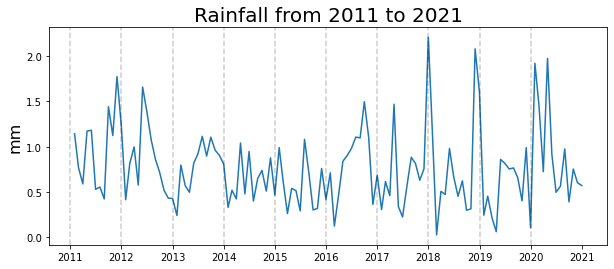

In [62]:
plt.figure(figsize=(10,4))
plt.plot(lim_rainfall)
plt.title('Rainfall from 2011 to 2021', fontsize=20)
plt.ylabel('mm', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [63]:
first_diff = lim_rainfall.diff()[1:]

In [64]:
first_diff

Time
2011-02-28   -0.372108
2011-03-31   -0.180712
2011-04-30    0.581843
2011-05-31    0.009960
2011-06-30   -0.651746
                ...   
2020-08-31    0.411973
2020-09-30   -0.583557
2020-10-31    0.361748
2020-11-30   -0.150745
2020-12-31   -0.031949
Freq: M, Name: Rainfall, Length: 119, dtype: float64

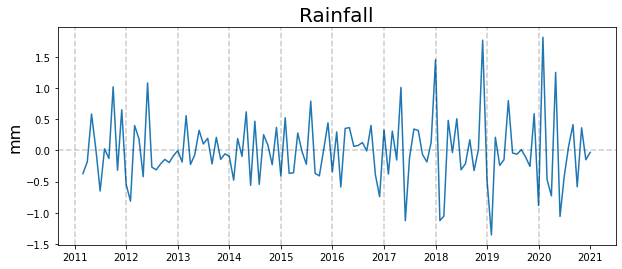

In [65]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Rainfall', fontsize=20)
plt.ylabel('mm', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [66]:
fd=pd.Series.to_numpy(first_diff)

In [67]:
fd

array([-0.37210847, -0.18071202,  0.58184268,  0.00996031, -0.65174644,
        0.02446897, -0.13024103,  1.01710437, -0.31861137,  0.65021413,
       -0.54395939, -0.81384186,  0.39731016,  0.18520494, -0.42089734,
        1.08109079, -0.26818777, -0.31275105, -0.21827304, -0.14445321,
       -0.19579701, -0.08598689, -0.00318305, -0.18791187,  0.55604285,
       -0.22632977, -0.07329971,  0.32137106,  0.10269415,  0.19293796,
       -0.21822052,  0.20862759, -0.14424797, -0.0562662 , -0.09593347,
       -0.47790546,  0.18942217, -0.09607058,  0.61649452, -0.56088217,
        0.46679394, -0.54551703,  0.25058386,  0.0870491 , -0.22896542,
        0.3673085 , -0.40923257,  0.52237545, -0.36890795, -0.35877688,
        0.27776719, -0.02492454, -0.22327433,  0.78922736, -0.370168  ,
       -0.40871009,  0.01689851,  0.44004454, -0.34259037,  0.29470301,
       -0.58782265,  0.35165771,  0.36427398,  0.0639854 ,  0.07746875,
        0.12492656, -0.00893674,  0.39943001, -0.39182823, -0.74

C:\Users\wsm\Downloads\a\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\wsm\Downloads\a\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<BarContainer object of 20 artists>

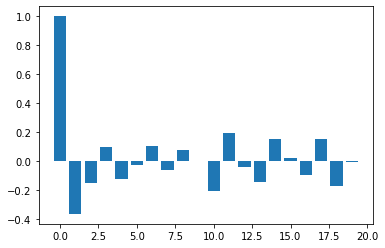

In [68]:
acf_vals = acf(fd)
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags])


In [69]:
acf_vals #

array([ 1.00000000e+00, -3.63598566e-01, -1.49965755e-01,  9.77120553e-02,
       -1.22665138e-01, -2.60902059e-02,  1.06748860e-01, -6.10985966e-02,
        7.92276740e-02,  7.32402233e-04, -2.03672900e-01,  1.96649758e-01,
       -3.97594038e-02, -1.40309049e-01,  1.56487349e-01,  2.34484247e-02,
       -9.41808675e-02,  1.51671861e-01, -1.72343764e-01, -6.07416831e-03,
        1.30321767e-01,  6.13695854e-03, -1.05055640e-01,  9.12480978e-02,
       -1.81839378e-01,  1.65176546e-01, -1.94277172e-02, -6.25712700e-02,
        3.86989357e-02,  1.00613758e-01, -1.07231255e-01,  3.07480246e-02,
       -1.69182978e-02, -4.86409935e-02,  1.18422820e-02,  3.22965254e-02,
        3.89811071e-02, -9.87983851e-03,  1.52736052e-02, -1.56840977e-01,
        2.10378869e-01])

<BarContainer object of 15 artists>

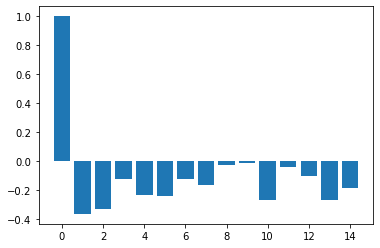

In [70]:
pacf_vals = pacf(first_diff, nlags=15)

num_lags = 15
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [71]:
pacf_vals

array([ 1.        , -0.36667991, -0.33156352, -0.12436797, -0.23638739,
       -0.24340046, -0.12298849, -0.16653135, -0.02789903, -0.01709685,
       -0.27389764, -0.04110569, -0.10177269, -0.26982433, -0.18961592,
       -0.12960024])

In [72]:
train_start = datetime(2011,1,1)

train_end = datetime(2020,1,1)

test_end = datetime(2021,1,1)

train_data =lim_rainfall[train_start:train_end]
test_data = lim_rainfall[train_end:test_end]
#first_diff[train_start + timedelta(days=7):train_end]
#first_diff.iloc[-1]
#first_diff.shape


In [73]:
lim_rainfall

Time
2011-01-31    1.142596
2011-02-28    0.770487
2011-03-31    0.589775
2011-04-30    1.171618
2011-05-31    1.181578
                ...   
2020-08-31    0.975038
2020-09-30    0.391481
2020-10-31    0.753230
2020-11-30    0.602485
2020-12-31    0.570536
Freq: M, Name: Rainfall, Length: 120, dtype: float64

In [74]:
train_data

Time
2011-01-31    1.142596
2011-02-28    0.770487
2011-03-31    0.589775
2011-04-30    1.171618
2011-05-31    1.181578
                ...   
2019-08-31    0.765693
2019-09-30    0.659742
2019-10-31    0.402680
2019-11-30    0.989956
2019-12-31    0.107202
Freq: M, Name: Rainfall, Length: 108, dtype: float64

In [75]:
test_data

Time
2020-01-31    1.919620
2020-02-29    1.453265
2020-03-31    0.724430
2020-04-30    1.973899
2020-05-31    0.914842
2020-06-30    0.497051
2020-07-31    0.563066
2020-08-31    0.975038
2020-09-30    0.391481
2020-10-31    0.753230
2020-11-30    0.602485
2020-12-31    0.570536
Freq: M, Name: Rainfall, dtype: float64

Stationary Check

In [96]:
import statsmodels.api as sm

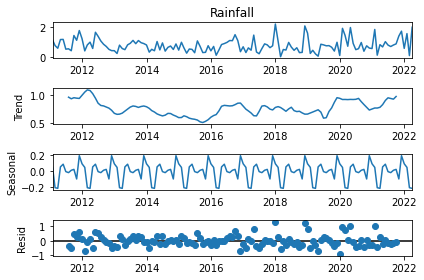

In [97]:
decomposition=sm.tsa.seasonal_decompose(Rainfall,model='additive')
fig=decomposition.plot()
plt.show()

In [98]:
from statsmodels.tsa.stattools import adfuller
adftest=adfuller(Rainfall)

In [99]:
print('pvalue of adfuller test is:',adftest[1])#stationary

pvalue of adfuller test is: 5.557773932314362e-18


The p-value demonstrates that it is stationary since it is much less than 0.05

In [76]:
my_order = (0,0,1)
my_seasonal_order = (1, 0, 1, 12)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

In [77]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 1.4445374011993408


In [78]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Rainfall   No. Observations:                  108
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 -69.748
Date:                            Sun, 15 May 2022   AIC                            147.495
Time:                                    09:51:54   BIC                            158.224
Sample:                                01-31-2011   HQIC                           151.846
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3625      0.108      3.342      0.001       0.150       0.575
ar.S.L12       0.9995      0.014   

In [79]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

Text(0, 0.5, 'Error')

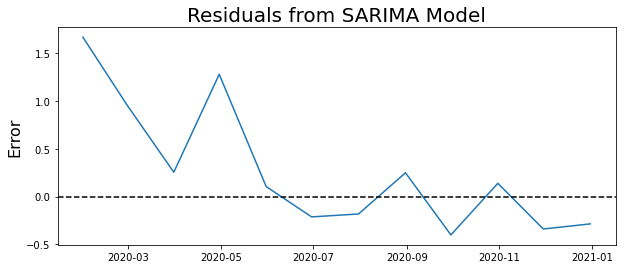

In [80]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

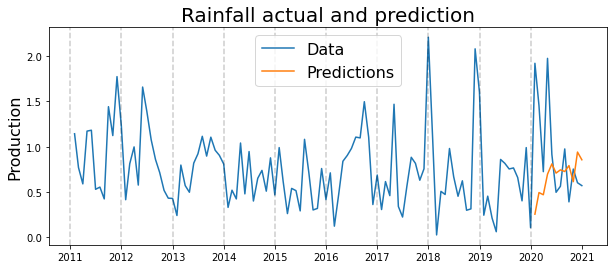

In [81]:
plt.figure(figsize=(10,4))

plt.plot(lim_rainfall)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Rainfall actual and prediction', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [112]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 1.1277


In [113]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.6858624566240038


In [83]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_rainfall[:train_end-timedelta(days=7)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

C:\Users\wsm\Downloads\a\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [84]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

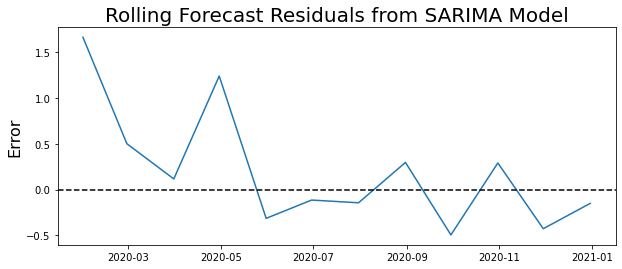

In [86]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

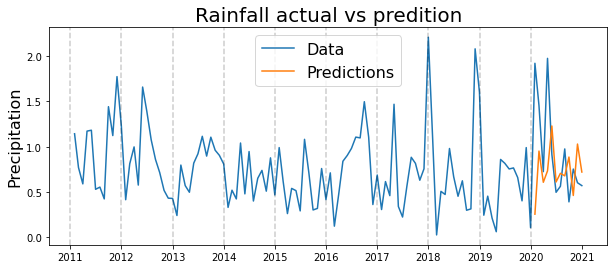

In [100]:
plt.figure(figsize=(10,4))

plt.plot(lim_rainfall)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Rainfall actual vs predition', fontsize=20)
plt.ylabel('Precipitation', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k',linestyle='--', alpha=0.2) 

In [89]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.4794


In [90]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 0.6662093078117032


In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

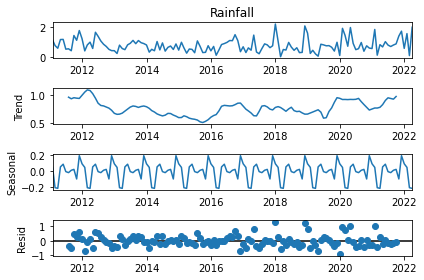

In [92]:
results = seasonal_decompose(Melbourne_rs_monthly['Rainfall'])
results.plot();

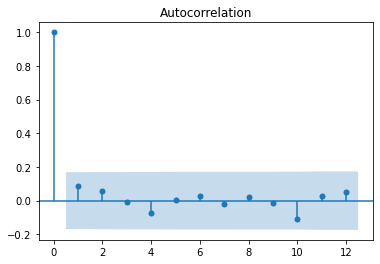

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Rainfall, lags =12)

plt.show()

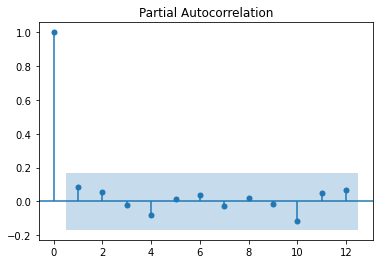

In [95]:
plot_pacf(Rainfall, lags =12)

plt.show()

In [108]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
fcast = model_fit.get_prediction(start=1, end=len(Rainfall))
rf_p = fcast.predicted_mean
rf_ci = fcast.conf_int()

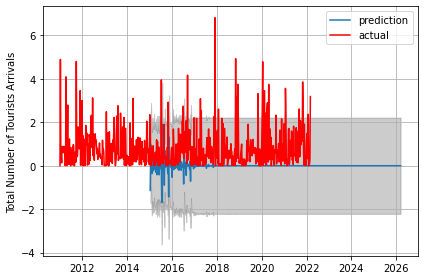

In [109]:
plt.plot(rf_p,label='prediction')
plt.plot(Rainfall,color='red',label='actual')
plt.fill_between(rf_ci.index[1:],
                rf_ci.iloc[1:, 0],
                rf_ci.iloc[1:, 1], color='k', alpha=.2)
plt.ylabel('Total Number of Tourists Arrivals')
plt.legend()
plt.tight_layout()
plt.grid()

plt.show()